# Classifying malignant/Benign cancer with ANN

In [22]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

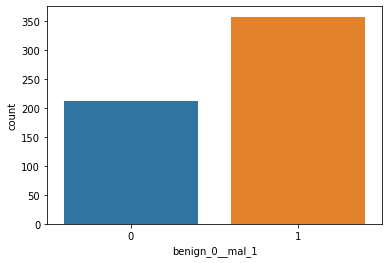

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

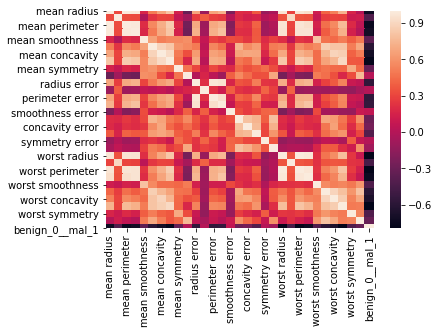

In [9]:
sns.heatmap(df.corr())

In [10]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

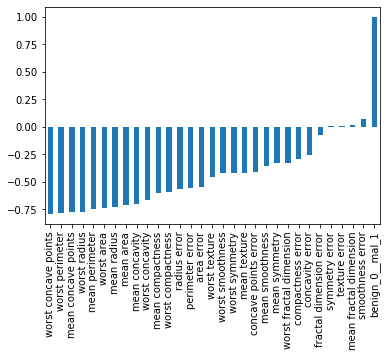

In [11]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

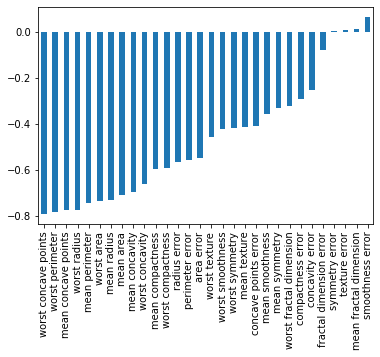

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model
   

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [21]:
X_train.shape

(426, 30)

In [26]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [27]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 3s 8ms/sample - loss: 0.6877 - val_loss: 0.6661
Epoch 2/600
426/426 [==============================] - 0s 103us/sample - loss: 0.6558 - val_loss: 0.6383
Epoch 3/600
426/426 [==============================] - 0s 152us/sample - loss: 0.6267 - val_loss: 0.6059
Epoch 4/600
426/426 [==============================] - 0s 103us/sample - loss: 0.5932 - val_loss: 0.5665
Epoch 5/600
426/426 [==============================] - 0s 130us/sample - loss: 0.5496 - val_loss: 0.5205
Epoch 6/600
426/426 [==============================] - 0s 124us/sample - loss: 0.5025 - val_loss: 0.4709
Epoch 7/600
426/426 [==============================] - 0s 137us/sample - loss: 0.4548 - val_loss: 0.4207
Epoch 8/600
426/426 [==============================] - 0s 133us/sample - loss: 0.4042 - val_loss: 0.3751
Epoch 9/600
426/426 [=

Epoch 75/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0538 - val_loss: 0.1234
Epoch 76/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0550 - val_loss: 0.1205
Epoch 77/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0582 - val_loss: 0.1302
Epoch 78/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0550 - val_loss: 0.1282
Epoch 79/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0532 - val_loss: 0.1254
Epoch 80/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0528 - val_loss: 0.1233
Epoch 81/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0525 - val_loss: 0.1252
Epoch 82/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0526 - val_loss: 0.1264
Epoch 83/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0550 - val_loss: 0.1310
Epoch 84/600
426/426 [===========================

Epoch 152/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0393 - val_loss: 0.1408
Epoch 153/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0389 - val_loss: 0.1401
Epoch 154/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0392 - val_loss: 0.1475
Epoch 155/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0392 - val_loss: 0.1444
Epoch 156/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0398 - val_loss: 0.1380
Epoch 157/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0429 - val_loss: 0.1430
Epoch 158/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0392 - val_loss: 0.1447
Epoch 159/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0392 - val_loss: 0.1496
Epoch 160/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0382 - val_loss: 0.1379
Epoch 161/600
426/426 [==============

Epoch 229/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0339 - val_loss: 0.1632
Epoch 230/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0315 - val_loss: 0.1608
Epoch 231/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0308 - val_loss: 0.1720
Epoch 232/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0313 - val_loss: 0.1576
Epoch 233/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0333 - val_loss: 0.1678
Epoch 234/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0331 - val_loss: 0.1623
Epoch 235/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0309 - val_loss: 0.1626
Epoch 236/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0300 - val_loss: 0.1734
Epoch 237/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0298 - val_loss: 0.1638
Epoch 238/600
426/426 [===============

426/426 [==============================] - 0s 129us/sample - loss: 0.0200 - val_loss: 0.2066
Epoch 382/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0180 - val_loss: 0.2087
Epoch 383/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0194 - val_loss: 0.2059
Epoch 384/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0207 - val_loss: 0.2145
Epoch 385/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0200 - val_loss: 0.1998
Epoch 386/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0203 - val_loss: 0.2043
Epoch 387/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0188 - val_loss: 0.2150
Epoch 388/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0180 - val_loss: 0.1990
Epoch 389/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0191 - val_loss: 0.2044
Epoch 390/600
426/426 [============================

Epoch 458/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0212 - val_loss: 0.2103
Epoch 459/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0198 - val_loss: 0.2768
Epoch 460/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0130 - val_loss: 0.2112
Epoch 461/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0175 - val_loss: 0.2257
Epoch 462/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0132 - val_loss: 0.2337
Epoch 463/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0151 - val_loss: 0.2413
Epoch 464/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0154 - val_loss: 0.2299
Epoch 465/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0170 - val_loss: 0.2197
Epoch 466/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0147 - val_loss: 0.2428
Epoch 467/600
426/426 [===============

In [ ]:
http://localhost:8891/notebooks/machinelearning/git/machine-learning/ann/ANN-classification.ipynb# model.history.history

In [ ]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
# model_loss

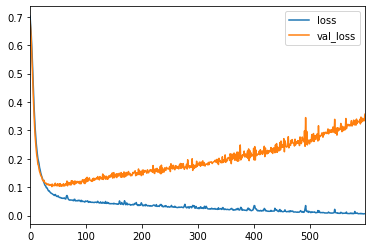

In [ ]:
model_loss.plot()

## Early Stopping


In [33]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [36]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 795us/sample - loss: 0.6840 - val_loss: 0.6682
Epoch 2/600
426/426 [==============================] - 0s 105us/sample - loss: 0.6493 - val_loss: 0.6339
Epoch 3/600
426/426 [==============================] - 0s 107us/sample - loss: 0.6163 - val_loss: 0.5990
Epoch 4/600
426/426 [==============================] - 0s 113us/sample - loss: 0.5814 - val_loss: 0.5618
Epoch 5/600
426/426 [==============================] - 0s 185us/sample - loss: 0.5425 - val_loss: 0.5185
Epoch 6/600
426/426 [==============================] - 0s 153us/sample - loss: 0.4981 - val_loss: 0.4729
Epoch 7/600
426/426 [==============================] - 0s 138us/sample - loss: 0.4532 - val_loss: 0.4224
Epoch 8/600
426/426 [==============================] - 0s 132us/sample - loss: 0.4037 - val_loss: 0.3719
Epoch 9/600
426/426 [==============================] - 0s 140us/sample - loss: 0.3584 - val_loss: 0.3314
Epoch 10/

Epoch 78/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0569 - val_loss: 0.1089
Epoch 79/600
426/426 [==============================] - 0s 123us/sample - loss: 0.0548 - val_loss: 0.0986
Epoch 80/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0573 - val_loss: 0.1031
Epoch 81/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0666 - val_loss: 0.1054
Epoch 82/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0562 - val_loss: 0.0979
Epoch 83/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0567 - val_loss: 0.1071
Epoch 84/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0543 - val_loss: 0.1015
Epoch 85/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0541 - val_loss: 0.1026
Epoch 86/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0539 - val_loss: 0.1045
Epoch 87/600
426/426 [========================

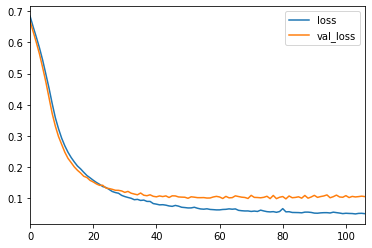

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

##  Adding in DropOut Layers

In [38]:
from tensorflow.keras.layers import Dropout

In [39]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [40]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6704 - val_loss: 0.6711
Epoch 2/600
426/426 [==============================] - 0s 97us/sample - loss: 0.6718 - val_loss: 0.6506
Epoch 3/600
426/426 [==============================] - 0s 218us/sample - loss: 0.6524 - val_loss: 0.6322
Epoch 4/600
426/426 [==============================] - 0s 147us/sample - loss: 0.6358 - val_loss: 0.6121
Epoch 5/600
426/426 [==============================] - 0s 129us/sample - loss: 0.6081 - val_loss: 0.5919
Epoch 6/600
426/426 [==============================] - 0s 127us/sample - loss: 0.6043 - val_loss: 0.5673
Epoch 7/600
426/426 [==============================] - 0s 141us/sample - loss: 0.5742 - val_loss: 0.5402
Epoch 8/600
426/426 [==============================] - 0s 125us/sample - loss: 0.5626 - val_loss: 0.5134
Epoch 9/600
426/426 [==============================] - 0s 139us/sample - loss: 0.5437 - val_loss: 0.4920
Epoch 10/600

Epoch 78/600
426/426 [==============================] - 0s 163us/sample - loss: 0.1387 - val_loss: 0.1018
Epoch 79/600
426/426 [==============================] - 0s 127us/sample - loss: 0.1432 - val_loss: 0.1295
Epoch 80/600
426/426 [==============================] - 0s 136us/sample - loss: 0.1473 - val_loss: 0.1034
Epoch 81/600
426/426 [==============================] - 0s 164us/sample - loss: 0.1311 - val_loss: 0.1002
Epoch 82/600
426/426 [==============================] - 0s 175us/sample - loss: 0.1397 - val_loss: 0.1086
Epoch 83/600
426/426 [==============================] - 0s 116us/sample - loss: 0.1166 - val_loss: 0.1002
Epoch 84/600
426/426 [==============================] - 0s 130us/sample - loss: 0.1201 - val_loss: 0.1082
Epoch 85/600
426/426 [==============================] - 0s 165us/sample - loss: 0.1310 - val_loss: 0.1073
Epoch 86/600
426/426 [==============================] - 0s 140us/sample - loss: 0.1396 - val_loss: 0.0999
Epoch 87/600
426/426 [========================

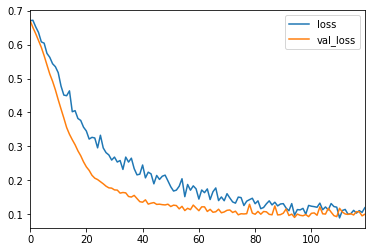

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [42]:
predictions = model.predict_classes(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [45]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
